[Perform Bitcoin Price Feature Engineering](https://levelup.gitconnected.com/how-to-perform-bitcoin-price-feature-engineering-using-python-4f972a546c05)

> Understanding Bitcoin Price Behavior Through Statistical and Visual Analysis

Bitcoin (`$BTC`) is one of the most widely traded cryptocurrencies, and its price has shown significant volatility since its inception.

To predict Bitcoin’s price movements, it is essential to build a dataset enriched with technical features derived from the raw price data.

In [1]:
!pip install -q yfinance matplotlib seaborn pandas numpy scikit-learn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

plt.style.use("dark_background")

# Create directory to save plots
os.makedirs("figures", exist_ok=True)

In [4]:
btc = yf.download("BTC-USD", start="2014-01-01")
btc.columns = btc.columns.get_level_values(0)
btc = btc[['Open', 'Close', 'Volume', 'Low', 'High']]

# Display first few rows
btc.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Open,Close,Volume,Low,High
Date,,,,,
2014-09-17,465.864014,457.334015,21056800,452.421997,468.174011
2014-09-18,456.859985,424.440002,34483200,413.104004,456.859985
2014-09-19,424.102997,394.795990,37919700,384.532013,427.834991
2014-09-20,394.673004,408.903992,36863600,389.882996,423.295990
2014-09-21,408.084991,398.821014,26580100,393.181000,412.425995


#### Range

In [5]:
print("Data range:", btc.index.min(), "to", btc.index.max())

Data range: 2014-09-17 00:00:00 to 2025-05-31 00:00:00


#### Missing Values

In [6]:
btc.isnull().sum()

Price
Open      0
Close     0
Volume    0
Low       0
High      0
dtype: int64

#### Data Types

In [7]:
btc.dtypes

Price
Open      float64
Close     float64
Volume      int64
Low       float64
High      float64
dtype: object

#### Statistics

In [8]:
btc.describe()

Price,Open,Close,Volume,Low,High
count,3910.000000,3910.000000,3.910000e+03,3910.000000,3910.000000
mean,22438.689075,22464.031964,1.953865e+10,21926.542764,22928.565458
std,26043.785406,26072.784548,2.094261e+10,25491.641733,26574.663420
min,176.897003,178.102997,5.914570e+06,171.509995,211.731003
25%,1986.174988,2008.862488,8.603485e+08,1900.842499,2093.317505
50%,9798.317871,9812.498047,1.573648e+10,9590.383789,10022.775879
75%,36638.018555,36648.264648,3.081297e+10,35228.841797,37553.859375
max,111679.359375,111673.281250,3.509679e+11,109285.070312,111970.171875


#### Calculating Daily Returns

In [9]:
btc["daily_return"] = btc["Close"].pct_change()
btc.dropna(inplace=True)

btc.head()

Price,Open,Close,Volume,Low,High,daily_return
Date,,,,,,
2014-09-18,456.859985,424.440002,34483200,413.104004,456.859985,-0.071926
2014-09-19,424.102997,394.795990,37919700,384.532013,427.834991,-0.069843
2014-09-20,394.673004,408.903992,36863600,389.882996,423.295990,0.035735
2014-09-21,408.084991,398.821014,26580100,393.181000,412.425995,-0.024659
2014-09-22,399.100006,402.152008,24127600,397.130005,406.915985,0.008352


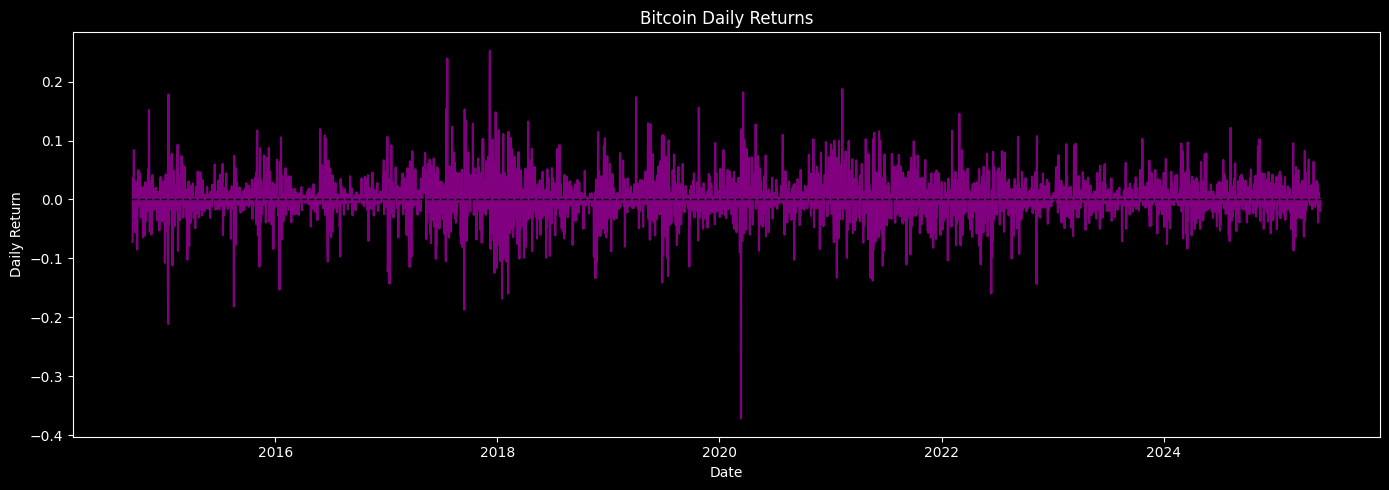

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(btc.index, btc["daily_return"], label="Daily Return", color="purple")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Bitcoin Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.savefig("figures/btc_daily_returns.png")
plt.show()

#### Adding Moving Averages

In [11]:
btc["ma_7"] = btc["Close"].rolling(window=7).mean()
btc["ma_30"] = btc["Close"].rolling(window=30).mean()
btc["ma_90"] = btc["Close"].rolling(window=90).mean()
btc.dropna(inplace=True)

btc.head()

Price,Open,Close,Volume,Low,High,daily_return,ma_7,ma_30,ma_90
Date,,,,,,,,,
2014-12-16,345.673004,327.062012,30864900,327.062012,345.859009,-0.052941,345.832572,365.315999,369.796589
2014-12-17,326.855011,319.776001,37567900,315.152008,333.954010,-0.022277,342.034145,363.061600,368.633655
2014-12-18,319.785004,311.395996,39173000,304.231995,323.709015,-0.026206,336.447000,360.934866,367.706989
2014-12-19,311.178986,317.842987,23823100,306.769012,318.532990,0.020704,331.489999,358.844466,366.695200
2014-12-20,317.618988,329.955994,20856700,316.044006,330.325012,0.038110,329.001426,357.914999,365.930033


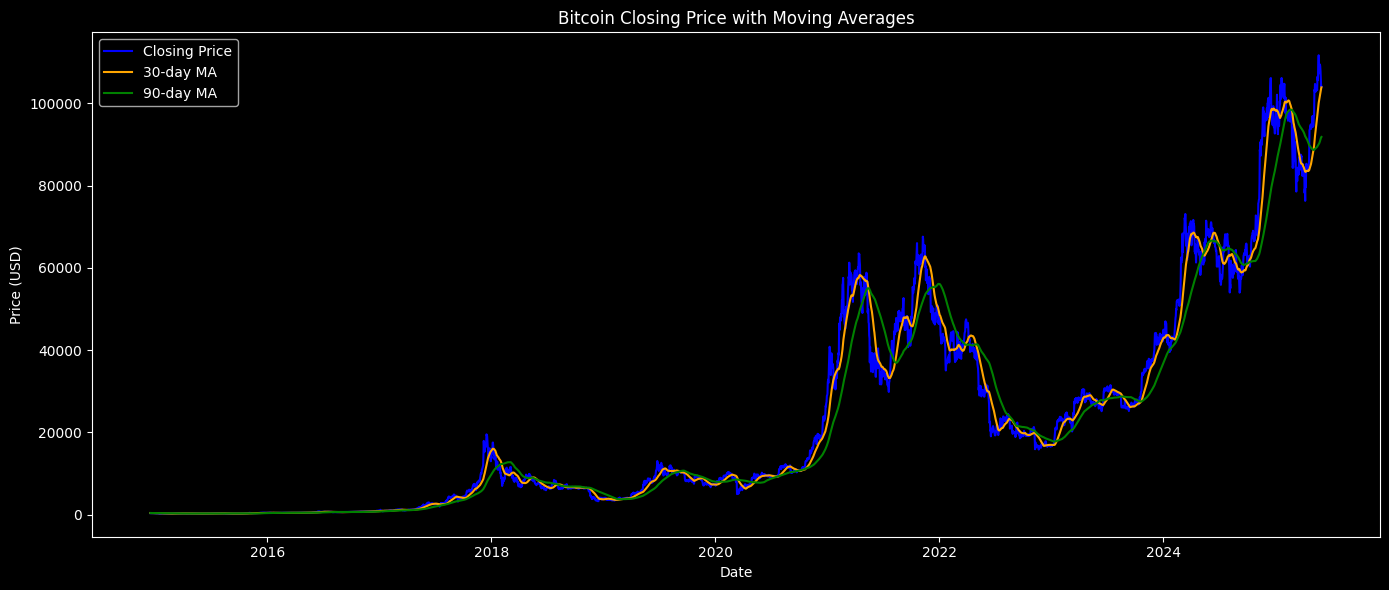

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(btc.index, btc["Close"], label="Closing Price", color="blue")
plt.plot(btc.index, btc["ma_30"], label="30-day MA", color="orange")
plt.plot(btc.index, btc["ma_90"], label="90-day MA", color="green")
plt.title("Bitcoin Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.savefig("figures/btc_price_ma.png")
plt.show()

#### Calculating Bollinger Bands

Bollinger Bands use a moving average and standard deviation to indicate price volatility and potential overbought or oversold conditions.

In [13]:
btc["ma_20"] = btc["Close"].rolling(window=20).mean()
btc["std_20"] = btc["Close"].rolling(window=20).std()
btc["upper_band"] = btc["ma_20"] + 2 * btc["std_20"]
btc["lower_band"] = btc["ma_20"] - 2 * btc["std_20"]
btc.dropna(inplace=True)

btc.head()

Price,Open,Close,Volume,Low,High,daily_return,ma_7,ma_30,ma_90,ma_20,std_20,upper_band,lower_band
Date,,,,,,,,,,,,,
2015-01-04,281.145996,264.195007,55629100,257.612000,287.230011,-0.060079,302.594003,329.061133,354.753522,315.703000,16.437820,348.578640,282.827360
2015-01-05,265.084015,274.473999,43962800,265.084015,278.341003,0.038907,297.137429,325.717433,354.067822,313.073599,18.590270,350.254140,275.893058
2015-01-06,274.610992,286.188995,23245700,272.696014,287.553009,0.042682,293.630572,322.753899,353.326144,311.394249,19.450099,350.294446,272.494052
2015-01-07,286.076996,294.337006,24866800,283.079010,298.753998,0.028471,289.936859,320.501499,352.540711,310.541299,19.820536,350.182372,270.900227
2015-01-08,294.135010,283.348999,19982500,282.174988,294.135010,-0.037331,285.522574,318.205833,351.671678,308.816600,20.635731,350.088061,267.545139


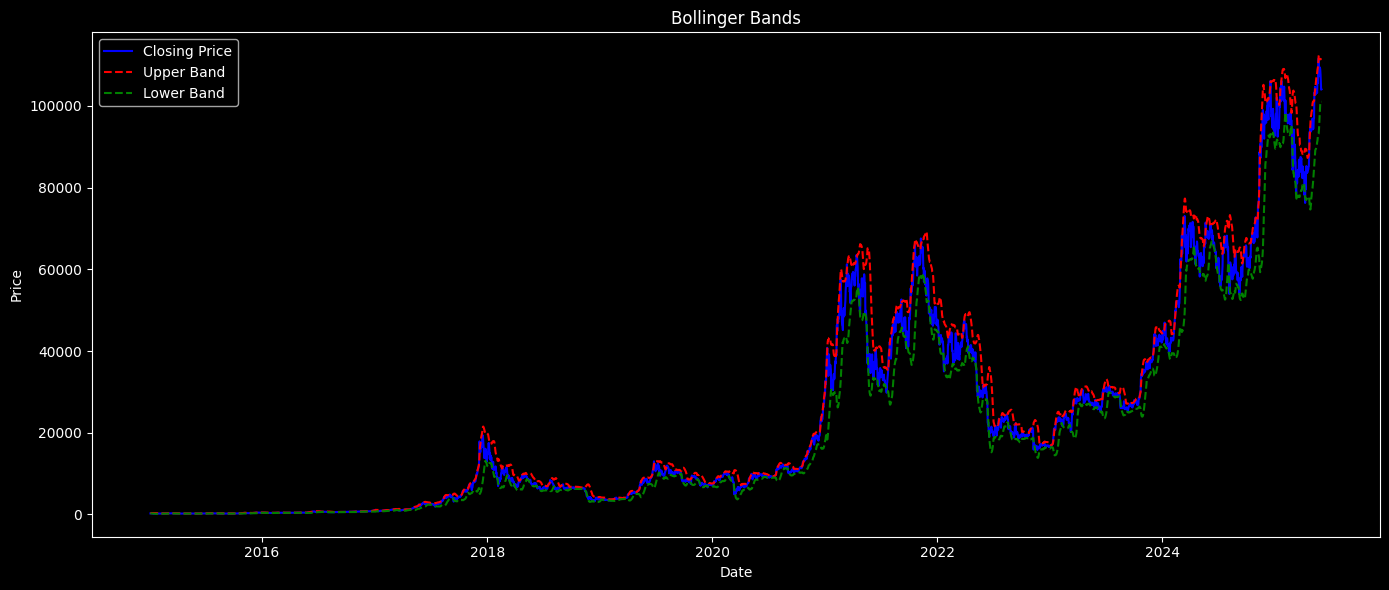

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(btc.index, btc["Close"], label="Closing Price", color="blue")
plt.plot(btc.index, btc["upper_band"], label="Upper Band", linestyle="--", color="red")
plt.plot(btc.index, btc["lower_band"], label="Lower Band", linestyle="--", color="green")
plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.savefig("figures/btc_bollinger_bands.png")
plt.show()

#### Computing Relative Strength Index (RSI)
RSI measures momentum and indicates overbought or oversold conditions. It ranges from 0 to 100 and is calculated based on average gains and losses over a 14-day period.

In [15]:
delta = btc["Close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain, index=btc.index).rolling(window=14).mean()
avg_loss = pd.Series(loss, index=btc.index).rolling(window=14).mean()

rs = avg_gain / avg_loss
btc["rsi_14"] = 100 - (100 / (1 + rs))

btc.head()

Price,Open,Close,Volume,Low,High,daily_return,ma_7,ma_30,ma_90,ma_20,std_20,upper_band,lower_band,rsi_14
Date,,,,,,,,,,,,,,
2015-01-04,281.145996,264.195007,55629100,257.612000,287.230011,-0.060079,302.594003,329.061133,354.753522,315.703000,16.437820,348.578640,282.827360,NaN
2015-01-05,265.084015,274.473999,43962800,265.084015,278.341003,0.038907,297.137429,325.717433,354.067822,313.073599,18.590270,350.254140,275.893058,NaN
2015-01-06,274.610992,286.188995,23245700,272.696014,287.553009,0.042682,293.630572,322.753899,353.326144,311.394249,19.450099,350.294446,272.494052,NaN
2015-01-07,286.076996,294.337006,24866800,283.079010,298.753998,0.028471,289.936859,320.501499,352.540711,310.541299,19.820536,350.182372,270.900227,NaN
2015-01-08,294.135010,283.348999,19982500,282.174988,294.135010,-0.037331,285.522574,318.205833,351.671678,308.816600,20.635731,350.088061,267.545139,NaN


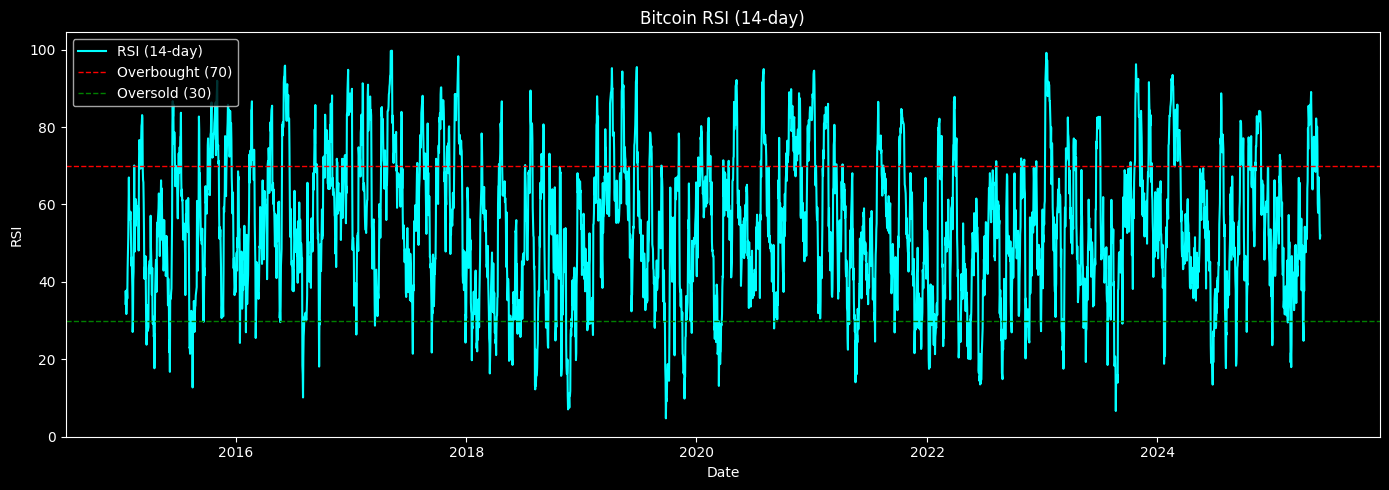

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(btc.index, btc["rsi_14"], label="RSI (14-day)", color="cyan")
plt.axhline(70, color="red", linestyle="--", linewidth=1, label="Overbought (70)")
plt.axhline(30, color="green", linestyle="--", linewidth=1, label="Oversold (30)")
plt.title("Bitcoin RSI (14-day)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("figures/btc_rsi_14.png")
plt.show()

#### Calculating Rolling Volatility

Volatility reflects the risk or variability of returns. Compute 30-day rolling standard deviation of daily returns to measure volatility over time:

In [17]:
btc["volatility_30"] = btc["daily_return"].rolling(window=30).std()
btc.dropna(inplace=True)

btc.head()

Price,Open,Close,Volume,Low,High,daily_return,ma_7,ma_30,ma_90,ma_20,std_20,upper_band,lower_band,rsi_14,volatility_30
Date,,,,,,,,,,,,,,,
2015-02-02,226.490997,238.229004,30612100,222.658997,242.175003,0.049596,234.284716,242.236566,315.889677,227.001600,22.366396,271.734392,182.268808,58.140350,0.073836
2015-02-03,237.453995,227.268005,40783700,224.483002,245.957001,-0.046010,229.112287,241.005666,314.642811,229.459850,19.184692,267.829234,191.090467,55.284306,0.073503
2015-02-04,227.511002,226.852997,26594300,221.113007,230.057999,-0.001826,228.103431,239.418299,313.282399,230.310300,18.638591,267.587482,193.033119,49.983795,0.073091
2015-02-05,227.664993,217.110992,22516400,214.725006,239.404999,-0.042944,225.760287,237.115699,311.890132,230.761000,18.176434,267.113869,194.408131,44.139033,0.072892
2015-02-06,216.923004,222.266006,24435300,216.231995,230.509995,0.023744,225.166144,234.713332,310.520999,231.911301,16.749957,265.411215,198.411386,46.305724,0.072818


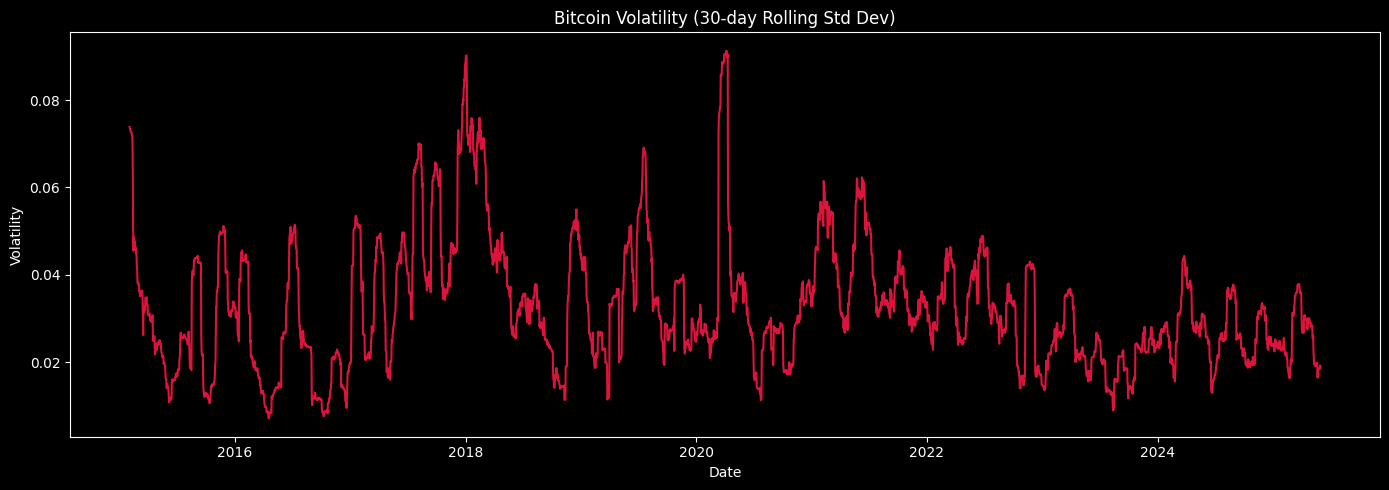

In [18]:
plt.figure(figsize=(14, 5))
plt.plot(btc.index, btc["volatility_30"], label="30-Day Rolling Volatility", color="crimson")
plt.title("Bitcoin Volatility (30-day Rolling Std Dev)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.savefig("figures/btc_volatility.png")
plt.show()

#### Saving and Inspecting Final Feature Set

In [19]:
btc.to_csv("btc_features.csv", index=False)

In [20]:
features = btc.columns.tolist()
btc[features].tail()

Price,Open,Close,Volume,Low,High,daily_return,ma_7,ma_30,ma_90,ma_20,std_20,upper_band,lower_band,rsi_14,volatility_30
Date,,,,,,,,,,,,,,,
2025-05-27,109440.406250,108994.640625,57450176272,107609.554688,110744.210938,-0.004073,109128.672991,102479.002083,91008.480903,105935.308984,2737.720289,111410.749562,100459.868407,63.015584,0.018261
2025-05-28,108992.171875,107802.328125,49155377493,106812.929688,109298.289062,-0.010939,108860.708705,102906.454687,91265.126476,106163.352344,2691.076901,111545.506147,100781.198541,61.161374,0.018429
2025-05-29,107795.570312,105641.757812,56022752042,105374.398438,108910.046875,-0.020042,107999.062500,103285.020312,91501.445920,106296.897656,2588.632188,111474.162033,101119.633280,54.505773,0.018850
2025-05-30,105646.210938,103998.570312,57655287183,103685.789062,106308.945312,-0.015554,107529.172991,103611.395573,91701.075434,106262.009766,2615.897330,111493.804425,101030.215106,51.134767,0.019168
2025-05-31,104007.585938,104077.117188,48752693248,103220.765625,104218.078125,0.000755,106998.595982,103864.221615,91810.283941,106260.547656,2617.173467,111494.894590,101026.200722,51.993747,0.018766


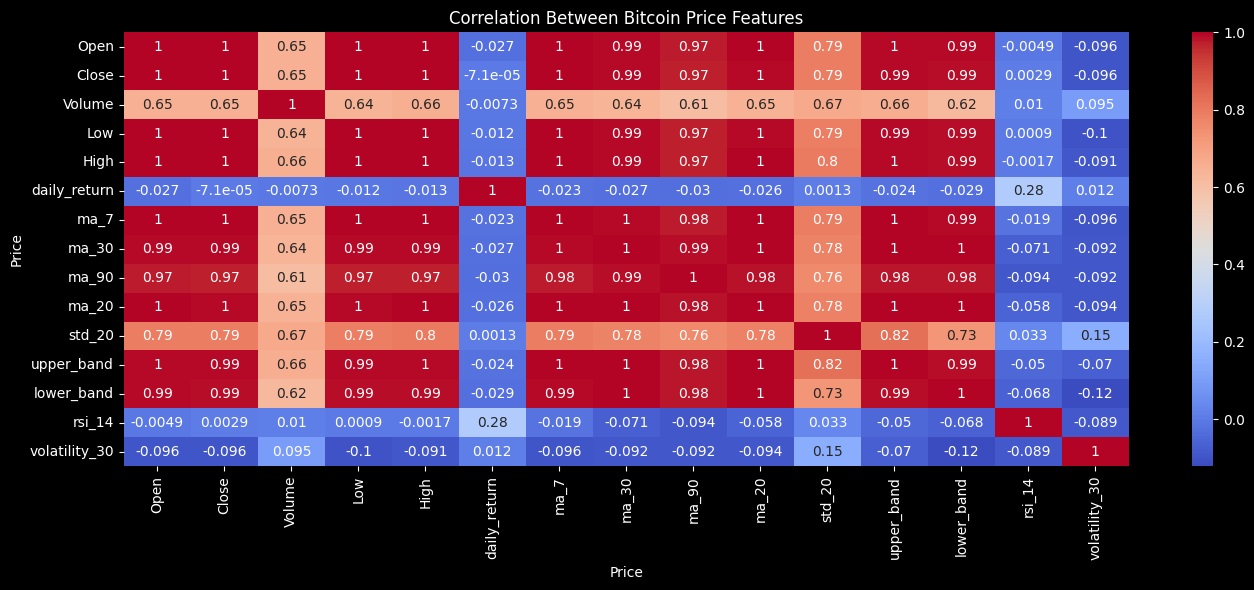

In [21]:
plt.figure(figsize=(14, 6))
sns.heatmap(btc[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Bitcoin Price Features")
plt.tight_layout()
plt.savefig("figures/btc_correlation_heatmap.png")
plt.show()